# Getting Started with MOON

<!--This notebook gives the instructions for how to get started with MetaQuantus, with methods explained in the paper:

[**The Meta-Evaluation Problem in Explainable AI:
Identifying Reliable Estimators with MetaQuantus**](https://arxiv.org/abs/2302.07265)-->

We will use the cMNIST dataset and a ResNet-9 model for demonstration. Make sure to have GPU enabled for performance gains.

In [1]:
# To access local files, we need to mount Google Drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Customise local paths

In [2]:
!pip install captum
!pip install -e drive/MyDrive/Projects/quantus/.
!pip install -e drive/MyDrive/Projects/MetaQuantus/.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Projects/quantus
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Projects/MetaQuantus
  Preparing metadata 

In [3]:
import sys

# Import local packages.
path = "/content/drive/MyDrive/Projects"
sys.path.append(f'{path}/quantus')
sys.path.append(f'{path}/MetaQuantus')
import quantus
import metaquantus

In [4]:
# Set paths.
PATH_ASSETS = "/content/drive/MyDrive/Projects/MetaQuantus/assets/"

# Reload changes.
#%load_ext autoreload
#%autoreload 2

# Import libraries.
from IPython.display import clear_output
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
import torch
import captum
warnings.filterwarnings("ignore", category=UserWarning)
clear_output()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device:', torch.cuda.get_device_name(0))
!nvidia-smi

Using device: Tesla T4
Thu Apr 27 11:16:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                 

In [5]:
# Run tests on MOON.
##########!pip install -r drive/MyDrive/Projects/quantus/requirements_test.txt
##########!python -m pytest drive/MyDrive/Projects/quantus/ -m moon

## 1) Preliminaries

In [20]:
from metaquantus import setup_dataset_models, setup_xai_settings, setup_estimators

### 1.1 Load data

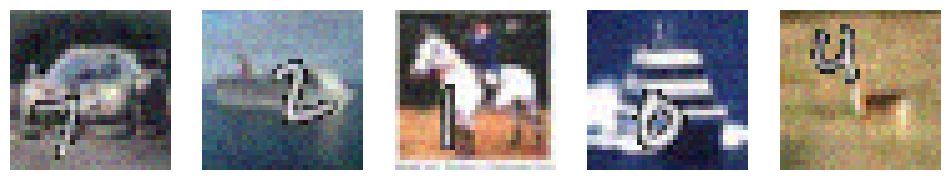

In [10]:
nr_test_samples = 100

# Load data.
dataset_name = "cMNIST"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get input, outputs settings.
dataset_settings, model_name = setup_dataset_models(
    dataset_name=dataset_name, path_assets=PATH_ASSETS, device=device
)
dataset_kwargs = dataset_settings[dataset_name]["estimator_kwargs"]

model = dataset_settings[dataset_name]["models"]["ResNet9"].eval()
x_batch = dataset_settings[dataset_name]["x_batch"][:nr_test_samples]
y_batch = dataset_settings[dataset_name]["y_batch"][:nr_test_samples]
s_batch = dataset_settings[dataset_name]["s_batch"][:nr_test_samples]

# Plot the data!
fix, ax = plt.subplots(1, 5, figsize=(12, 4))
for i in range(5): 
    #ax[i].imshow(np.moveaxis(x_batch[i], 0, -1).reshape(28, 28,1))
    ax[i].imshow(np.moveaxis(x_batch[i], 0, -1).reshape(32, 32, 3))
    #ax[i].imshow(np.moveaxis(x_batch[i], 0, -1).reshape(224, 224, 3))
    ax[i].axis("off")
plt.show()

### 1.2 Load explanations

In [11]:
"""
# Load explanation methods.
xai_setting = ["LayerGradCam", "Saliency", Gr]
xai_methods = setup_xai_settings(
    xai_settings=xai_setting,
    gc_layer=dataset_settings[dataset_name]["gc_layers"][model_name],
    img_size=dataset_kwargs["img_size"],
    nr_channels=dataset_kwargs["nr_channels"],
)

# Generate explanations.
explanations = {}
for method, kwargs in xai_methods.items():
    model = dataset_settings[dataset_name]["models"]["ResNet9"].eval().cpu()
    explanations[method] = quantus.explain(model=model, inputs=x_batch[:10], targets=y_batch[:10], **{**{"method": method}, **kwargs})


# Plot the explanations!
indices = [4, 8]
fix, ax = plt.subplots(len(indices), len(xai_methods)+1, figsize=(12, 4))

for index, sample in enumerate(indices):
    ax[index, 0].imshow(np.moveaxis(x_batch[sample], 0, -1).reshape(32,32, 3))
    ax[index, 0].axis("off")
    for ix, (method, kwargs) in enumerate(xai_methods.items()):
        ax[index, ix+1].imshow(explanations[method][sample].reshape(32,32))
        ax[index, ix+1].axis("off")
        ax[index, ix+1].set_title(method)
    plt.show()
""";

### 1.3 Define MOON

In [21]:
"""This module contains the implementation of the MOON metric."""

# This file is part of Quantus.
# Quantus is free software: you can redistribute it and/or modify it under the terms of the GNU Lesser General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
# Quantus is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU Lesser General Public License for more details.
# You should have received a copy of the GNU Lesser General Public License along with Quantus. If not, see <https://www.gnu.org/licenses/>.
# Quantus project URL: <https://github.com/understandable-machine-intelligence-lab/Quantus>.

from typing import Any, Callable, Dict, List, Optional, Tuple
import numpy as np

from quantus.helpers import asserts
from quantus.helpers import warn
from quantus.helpers.utils import get_wrapped_model
from quantus.helpers.model.model_interface import ModelInterface
from quantus.functions.normalise_func import normalise_by_max
from quantus.functions.perturb_func import gaussian_noise
from quantus.functions.similarity_func import correlation_spearman, distance_euclidean
from quantus.metrics.base_batched import BatchedPerturbationMetric


class MOON(BatchedPerturbationMetric):
    """
    Implementation of the MOON metric by Hedström et al., 2023.

    INSERT DESC.

    References:
        1) INSERT CITATION.
    """

    @asserts.attributes_check
    def __init__(
        self,
        similarity_func: Optional[Callable] = None,
        norm_preds: Optional[Callable] = None,
        norm_expls: Optional[Callable] = None,
        nr_models: int = 10,
        noise_levels: Optional[np.ndarray] = None,
        abs: bool = False,
        normalise: bool = True,
        normalise_func: Optional[Callable[[np.ndarray], np.ndarray]] = None,
        normalise_func_kwargs: Optional[Dict[str, Any]] = None,
        perturb_func: Callable = None,
        perturb_func_kwargs: Optional[Dict[str, Any]] = None,
        return_aggregate: bool = False,
        aggregate_func: Callable = np.mean,
        default_plot_func: Optional[Callable] = None,
        disable_warnings: bool = False,
        display_progressbar: bool = False,
        **kwargs,
    ):
        """
        Parameters
        ----------
        similarity_func: callable
            Similarity function applied to compare input and perturbed input.
            If None, the default value is used, default=spearson_correlation.
        norm_preds: callable
            Function for norm calculations on the predictions.
            If None, the default value is used, default=distance_euclidean.
        norm_expls: callable
            Function for norm calculations on the explanations.
            If None, the default value is used, default=distance_euclidean.
        nr_models: integer
            The number of models iterated, default=10.
        abs: boolean
            Indicates whether absolute operation is applied on the attribution, default=False.
        normalise: boolean
            Indicates whether normalise operation is applied on the attribution, default=True.
        normalise_func: callable
            Attribution normalisation function applied in case normalise=True.
            If normalise_func=None, the default value is used, default=normalise_by_max.
        normalise_func_kwargs: dict
            Keyword arguments to be passed to normalise_func on call, default={}.
        perturb_func: callable
            Input perturbation function. If None, the default value is used,
            default=gaussian_noise.
        perturb_func_kwargs: dict
            Keyword arguments to be passed to perturb_func, default={}.
        return_aggregate: boolean
            Indicates if an aggregated score should be computed over all instances.
        aggregate_func: callable
            Callable that aggregates the scores given an evaluation call.
        default_plot_func: callable
            Callable that plots the metrics result.
        disable_warnings: boolean
            Indicates whether the warnings are printed, default=False.
        display_progressbar: boolean
            Indicates whether a tqdm-progress-bar is printed, default=False.
        kwargs: optional
            Keyword arguments.
        """
        if normalise_func is None:
            normalise_func = normalise_by_max

        if perturb_func is None:
            perturb_func = gaussian_noise

        if perturb_func_kwargs is None:
            perturb_func_kwargs = {}
        # perturb_func_kwargs["perturb_mean"] = perturb_mean
        # perturb_func_kwargs["perturb_std"] = perturb_std

        super().__init__(
            abs=abs,
            normalise=normalise,
            normalise_func=normalise_func,
            normalise_func_kwargs=normalise_func_kwargs,
            perturb_func=perturb_func,
            perturb_func_kwargs=perturb_func_kwargs,
            return_aggregate=return_aggregate,
            aggregate_func=aggregate_func,
            default_plot_func=default_plot_func,
            display_progressbar=display_progressbar,
            disable_warnings=disable_warnings,
            **kwargs,
        )

        # Save metric-specific attributes.
        self.nr_models = nr_models
        self.noise_levels = noise_levels

        if similarity_func is None:
            similarity_func = correlation_spearman
        self.similarity_func = similarity_func

        if norm_preds is None:
            norm_preds = distance_euclidean
        self.norm_preds = norm_preds

        if norm_expls is None:
            norm_expls = distance_euclidean
        self.norm_expls = norm_expls

        # Asserts and warnings.
        if not self.disable_warnings:
            warn.warn_parameterisation(
                metric_name=self.__class__.__name__,
                sensitive_params=(
                    "the number of samples iterated "
                    "over 'nr_models', the function to perturb the input 'perturb_func',"
                    " the similarity metric 'similarity_func' as well as norm "
                    "calculations on the prediction and explanation differenes "
                    "i.e., 'norm_preds' and 'norm_expls'"
                ),
                citation=(
                    "Alvarez-Melis, David, and Tommi S. Jaakkola. 'On the robustness of "
                    "interpretability methods.' arXiv preprint arXiv:1806.08049 (2018). and "
                    "Alvarez-Melis, David, and Tommi S. Jaakkola. 'Towards robust interpretability"
                    " with self-explaining neural networks.' arXiv preprint "
                    "arXiv:1806.07538 (2018)"
                ),
            )
            # warn.warn_noise_zero(noise=perturb_std)

        # For debugging purposes.
        self.delta_expls = np.array([])
        self.delta_preds = np.array([])
        self.preds_labels = np.array([])
        self.preds_perturbed = np.array([])
        self.preds_correct = np.array([])

    def __call__(
        self,
        model,
        x_batch: np.array,
        y_batch: np.array,
        a_batch: Optional[np.ndarray] = None,
        s_batch: Optional[np.ndarray] = None,
        channel_first: Optional[bool] = None,
        explain_func: Optional[Callable] = None,
        explain_func_kwargs: Optional[Dict] = None,
        model_predict_kwargs: Optional[Dict] = None,
        softmax: Optional[bool] = True,
        device: Optional[str] = None,
        batch_size: int = 64,
        custom_batch: Optional[Any] = None,
        **kwargs,
    ) -> List[float]:
        """
        This implementation represents the main logic of the metric and makes the class object callable.
        It completes instance-wise evaluation of explanations (a_batch) with respect to input data (x_batch),
        output labels (y_batch) and a torch or tensorflow model (model).

        Calls general_preprocess() with all relevant arguments, calls
        () on each instance, and saves results to last_results.
        Calls custom_postprocess() afterwards. Finally returns last_results.

        Parameters
        ----------
        model: torch.nn.Module, tf.keras.Model
            A torch or tensorflow model that is subject to explanation.
        x_batch: np.ndarray
            A np.ndarray which contains the input data that are explained.
        y_batch: np.ndarray
            A np.ndarray which contains the output labels that are explained.
        a_batch: np.ndarray, optional
            A np.ndarray which contains pre-computed attributions i.e., explanations.
        s_batch: np.ndarray, optional
            A np.ndarray which contains segmentation masks that matches the input.
        channel_first: boolean, optional
            Indicates of the image dimensions are channel first, or channel last.
            Inferred from the input shape if None.
        explain_func: callable
            Callable generating attributions.
        explain_func_kwargs: dict, optional
            Keyword arguments to be passed to explain_func on call.
        model_predict_kwargs: dict, optional
            Keyword arguments to be passed to the model's predict method.
        softmax: boolean
            Indicates whether to use softmax probabilities or logits in model prediction.
            This is used for this __call__ only and won't be saved as attribute. If None, self.softmax is used.
        device: string
            Indicated the device on which a torch.Tensor is or will be allocated: "cpu" or "gpu".
        kwargs: optional
            Keyword arguments.

        Returns
        -------
        last_results: list
            a list of Any with the evaluation scores of the concerned batch.

        Examples:
        --------
            # Minimal imports.
            >> import quantus
            >> from quantus import LeNet
            >> import torch

            # Enable GPU.
            >> device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

            # Load a pre-trained LeNet classification model (architecture at quantus/helpers/models).
            >> model = LeNet()
            >> model.load_state_dict(torch.load("tutorials/assets/pytests/mnist_model"))

            # Load MNIST datasets and make loaders.
            >> test_set = torchvision.datasets.MNIST(root='./sample_data', download=True)
            >> test_loader = torch.utils.data.DataLoader(test_set, batch_size=24)

            # Load a batch of inputs and outputs to use for XAI evaluation.
            >> x_batch, y_batch = iter(test_loader).next()
            >> x_batch, y_batch = x_batch.cpu().numpy(), y_batch.cpu().numpy()

            # Generate Saliency attributions of the test set batch of the test set.
            >> a_batch_saliency = Saliency(model).attribute(inputs=x_batch, target=y_batch, abs=True).sum(axis=1)
            >> a_batch_saliency = a_batch_saliency.cpu().numpy()

            # Initialise the metric and evaluate explanations by calling the metric instance.
            >> metric = Metric(abs=True, normalise=False)
            >> scores = metric(model=model, x_batch=x_batch, y_batch=y_batch, a_batch=a_batch_saliency}
        """
        if self.noise_levels is None:
            self.noise_levels = self.compute_noise_levels(
                model=model, x_batch=x_batch, y_batch=y_batch
            )

        self.channel_first = channel_first
        self.softmax = softmax
        self.device = device
        self.model_predict_kwargs = model_predict_kwargs

        return super().__call__(
            model=model,
            x_batch=x_batch,
            y_batch=y_batch,
            a_batch=a_batch,
            s_batch=s_batch,
            custom_batch=None,
            channel_first=channel_first,
            explain_func=explain_func,
            explain_func_kwargs=explain_func_kwargs,
            softmax=softmax,
            device=device,
            model_predict_kwargs=model_predict_kwargs,
            batch_size=batch_size,
            **kwargs,
        )

    def evaluate_batch(
        self,
        model: ModelInterface,
        x_batch: np.ndarray,
        y_batch: np.ndarray,
        a_batch: np.ndarray,
        s_batch: np.ndarray,
    ) -> np.ndarray:
        """
        Evaluates model and attributes on a single data batch and returns the batched evaluation result.

        Parameters
        ----------
        model: ModelInterface
            A ModelInterface that is subject to explanation.
        x_batch: np.ndarray
            The input to be evaluated on a batch-basis.
        y_batch: np.ndarray
            The output to be evaluated on a batch-basis.
        a_batch: np.ndarray
            The explanation to be evaluated on a batch-basis.
        s_batch: np.ndarray
            The segmentation to be evaluated on a batch-basis.

        Returns
        -------
           np.ndarray
            The batched evaluation results.
        """
        batch_size = x_batch.shape[0]
        similarities = np.zeros((self.nr_models, len(x_batch))) * np.nan
        self.delta_preds = (
            np.zeros((len(self.noise_levels), self.nr_models, len(x_batch))) * np.nan
        )
        self.delta_expls = (
            np.zeros((len(self.noise_levels), self.nr_models, len(x_batch))) * np.nan
        )
        self.preds_labels = (
            np.zeros((len(self.noise_levels), self.nr_models, len(x_batch))) * np.nan
        )
        self.preds_perturbed = (
            np.zeros((len(self.noise_levels), self.nr_models, len(x_batch))) * np.nan
        )

        # Predict with original model and save for correct label.
        preds = [model.predict(x_batch)[i, y] for i, y in enumerate(y_batch)]
        self.preds_correct = np.array([1 if int(p_pred) == int(p_true) else 0 for p_pred, p_true in zip(np.argmax(model.predict(x_batch), axis=1), y_batch)])

        for noise_id, std in enumerate(self.noise_levels):

            # Sample models.
            for model_id in range(self.nr_models):

                # Perturb model.
                model_perturbed = model.sample(
                    mean=1.0, std=std, noise_type="multiplicative"
                )

                # Wrap models.
                model_perturbed = get_wrapped_model(
                    model=model_perturbed,
                    channel_first=self.channel_first,
                    softmax=self.softmax,
                    device=self.device,
                    model_predict_kwargs=self.model_predict_kwargs,
                )

                # Predict with the perturbed model.
                preds_ = model_perturbed.predict(x_batch)
                preds_perturbed = [
                    preds_[i, y]
                    for i, y in enumerate(y_batch)
                ]

                # Generate explanation based on perturbed model.
                a_perturbed = self.explain_func(
                    model=model_perturbed.get_model(),
                    inputs=x_batch,
                    targets=y_batch,
                    **self.explain_func_kwargs,
                )

                if self.normalise:
                    a_perturbed = self.normalise_func(
                        a_perturbed,
                        **self.normalise_func_kwargs,
                    )

                if self.abs:
                    a_perturbed = np.abs(a_perturbed)

                # Measure deltas for each sample.
                for sample_id in range(batch_size):
                    self.delta_preds[noise_id, model_id, sample_id] = self.norm_preds(
                        a=np.array(preds[sample_id]).reshape(-1),
                        b=np.array(preds_perturbed[sample_id]).reshape(-1),
                    )
                    self.delta_expls[noise_id, model_id, sample_id] = self.norm_expls(
                        a=a_batch[sample_id].flatten(),
                        b=a_perturbed[sample_id].flatten(),
                    )

                # Save predictions and labels.
                self.preds_perturbed[noise_id, model_id, :] = np.array(preds_perturbed).flatten()
                self.preds_labels[noise_id, model_id, :] = np.argmax(preds_, axis=1).flatten()

        # Measure similarity between model and explanation function for each sample, average over the model.
        for model_id in range(self.nr_models):
            for sample_id in range(batch_size):
                similarity = self.similarity_func(
                    a=self.delta_preds[:, model_id, sample_id],
                    b=self.delta_expls[:, model_id, sample_id],
                )
                similarities[model_id, sample_id] = similarity

        self.similarities = similarities
        self.moon = np.mean(similarities, axis=0)

        return self.moon

    def custom_preprocess(
        self,
        model: ModelInterface,
        x_batch: np.ndarray,
        y_batch: Optional[np.ndarray],
        a_batch: Optional[np.ndarray],
        s_batch: np.ndarray,
        custom_batch: Optional[np.ndarray],
    ) -> None:
        """
        Implementation of custom_preprocess_batch.

        Parameters
        ----------
        model: torch.nn.Module, tf.keras.Model
            A torch or tensorflow model e.g., torchvision.models that is subject to explanation.
        x_batch: np.ndarray
            A np.ndarray which contains the input data that are explained.
        y_batch: np.ndarray
            A np.ndarray which contains the output labels that are explained.
        a_batch: np.ndarray, optional
            A np.ndarray which contains pre-computed attributions i.e., explanations.
        s_batch: np.ndarray, optional
            A np.ndarray which contains segmentation masks that matches the input.
        custom_batch: any
            Gives flexibility ot the user to use for evaluation, can hold any variable.

        Returns
        -------
        None
        """
        # Additional explain_func assert, as the one in prepare() won't be
        # executed when a_batch != None.
        asserts.assert_explain_func(explain_func=self.explain_func)

    def compute_noise_levels(
        self,
        model,
        x_batch: np.array,
        y_batch: np.array,
    ):
        # Goal is to get a "step size" like ...

        # Find the minimum noise level that leads to a randomly-behaving model.
        std_max = None
        # Find
        std_min = None

        pass


In [22]:
def plot_moon_results(noise_levels, labels_correct, delta_preds, delta_expls, method: str = "") -> None:

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    ax[0].plot(noise_levels, labels_correct.mean(axis=(1, 2)), label="Acc", c="blue")
    ax[0].set_title("$\Delta$ vs Acc")
    ax[0].set_xlabel("$\Delta$"); ax[0].set_ylabel("Accuracy")

    ci = 2 * np.std(delta_preds.mean(axis=0))
    ax[1].plot(noise_levels, delta_preds.mean(axis=1), label="$D_{f}$", c="darkorange")
    ax[1].fill_between(noise_levels, (delta_preds.mean(axis=1)-ci), (delta_preds.mean(axis=1)+ci), color='darkorange', alpha=.1)

    ci = 2 * np.std(delta_expls.mean(axis=0))
    ax[1].plot(noise_levels, delta_expls.mean(axis=1), label="$D_{\Phi}$", c="green")
    ax[1].fill_between(noise_levels, (delta_expls.mean(axis=1)-ci), (delta_expls.mean(axis=1)+ci), color='green', alpha=.1)

    ax[1].set_title("$\Delta$ vs $D_{f}$ vs $D_{\Phi}$")
    ax[1].set_xlabel("$\Delta$"); ax[1].set_ylabel("$D_{*}$")
    ax[1].legend()
    ax[1].set_xlim(noise_levels[0]-0.1, noise_levels[-1]+0.1); ax[1].set_ylim(-0.1, 1.1)

    ax[2].scatter(delta_preds, delta_expls, alpha=0.75)
    ax[2].set_title("$D_{f}$ vs $D_{\Phi}$")
    ax[2].set_xlabel("$D_{f}$"); ax[2].set_ylabel("$D_{\Phi}$") 
    ax[2].set_xlim(-0.1, 1.1); ax[2].set_ylim(-0.1, 1.1)

    fig.suptitle(method)
    plt.tight_layout()
    plt.show()

In [23]:
quantus.AVAILABLE_XAI_METHODS_CAPTUM

['GradientShap',
 'IntegratedGradients',
 'DeepLift',
 'DeepLiftShap',
 'InputXGradient',
 'Saliency',
 'FeatureAblation',
 'Deconvolution',
 'FeaturePermutation',
 'Lime',
 'KernelShap',
 'LRP',
 'Gradient',
 'Occlusion',
 'LayerGradCam',
 'GuidedGradCam',
 'LayerConductance',
 'LayerActivation',
 'InternalInfluence',
 'LayerGradientXActivation',
 'Control Var. Sobel Filter',
 'Control Var. Constant',
 'Control Var. Random Uniform']

In [24]:
# Load explanation methods.
xai_setting = ["LayerGradCam"]
xai_methods = setup_xai_settings(
    xai_settings=xai_setting,
    gc_layer=dataset_settings[dataset_name]["gc_layers"][model_name],
    img_size=dataset_kwargs["img_size"],
    nr_channels=dataset_kwargs["nr_channels"],
)
xai_methods["LayerGradCam"]["layer"] =  xai_methods["LayerGradCam"]["gc_layer"]
del xai_methods["LayerGradCam"]["gc_layer"]
#del xai_methods["LayerGradCam"]["interpolate"]
#del xai_methods["LayerGradCam"]["interpolate_mode"]

In [25]:
nr_samples = 10
noise_levels = [0.01, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5]
xai_methods = {**xai_methods, **{"Gradient": {}, "Saliency": {}, "GradientShap": {}, "IntegratedGradients": {}, "Control Var. Random Uniform": {}}} #, "Control Var. Constant": {"constant_value": "black"}}
xai_methods = {"Gradient": {}, "Saliency": {}, "GradientShap": {}, "IntegratedGradients": {}, "Control Var. Random Uniform": {}}

In [26]:
#import scipy
#scipy.stats.d(np.zeros(100), np.zeros(100))

In [27]:
scores = {}

for method, xai_lib_kwargs in xai_methods.items():

    kwargs = {**xai_lib_kwargs, **{"method": method, "xai_lib": "captum", "xai_lib_kwargs": xai_lib_kwargs}}
    
    # Init MOON.
    moon_init = MOON(nr_models=20,
                     noise_levels=noise_levels,
                     abs=False,
                     normalise=True,
                     normalise_func=quantus.normalise_func.normalise_by_average_second_moment_estimate,
                     return_aggregate=False,
                     aggregate_func=np.mean,
                     disable_warnings=True,
                     display_progressbar=False)

    # Score MOON.
    scores[method] = moon_init(
            model=model,
            x_batch=x_batch[:nr_samples],
            y_batch=y_batch[:nr_samples],
            a_batch=None,
            explain_func=quantus.explain,
            explain_func_kwargs=kwargs,
            device=device,
        )
    
    # Prepare data from the run data.
    labels_correct = np.equal(moon_init.preds_labels, y_batch[:nr_samples])
    
    delta_preds = moon_init.delta_preds[:, :, moon_init.preds_correct.astype(bool)].reshape(moon_init.delta_preds.shape[0], -1)
    delta_expls = moon_init.delta_expls[:, :, moon_init.preds_correct.astype(bool)].reshape(moon_init.delta_expls.shape[0], -1)
    delta_expls = delta_expls / delta_expls.max()

    # Plot!
    title = method+" ρ=" + f"{np.mean(scores[method]):.3f} ({np.std(scores[method]):.3f})"
    plot_moon_results(noise_levels, labels_correct, delta_preds, delta_expls, title)

RuntimeError: ignored

In [ ]:
%%capture 
# @title Generate noise levels
def evaluate_model_accuracy(model,
                          x_batch: np.array,
                          y_batch: np.array):
    pass


def calculate_relative_accuracy_drop(acc_original, acc_perturbed, chance_level=0.1):
    """Calculate relative accuracy drop as the model gets increasinly perturbed."""
    return float(1 - ((acc_perturbed - chance_level) / (acc_original - chance_level)))

def calculate_absolute_accuracy_drop(acc_original, acc_perturbed, chance_level=0.1):
    """Calculate absolute accuracy drop as the model gets increasinly perturbed."""
    return float(abs(acc_original) - abs(acc_perturbed))
    
import numpy as np

def generate_noise_levels(model,
                          x_batch: np.array,
                          y_batch: np.array,
                          n):
    
    # Initialise array of n noise levels.
    noise_levels = np.zeros(n)
    
    # Calculate step size between noise levels.
    step = 1 / (n - 1)
    
    # Set first noise level to 0 (no drop in accuracy).
    noise_levels[0] = 0
    
    # Set remaining noise levels.
    for i in range(1, n):
        noise_levels[i] = i * step
    
    # Reverse array so highest noise level is at end
    noise_levels = np.flip(noise_levels)
    
    return noise_levels

def compute_noise_levels(self,
                        model,
                        x_batch: np.array,
                        y_batch: np.array,):
    # Goal is to get a "step size" like ...

    # Find the minimum noise level that leads to a randomly-behaving model.
    std_max = None
    # Find
    std_min = None

### 1.4 Load estimators

In [50]:
# Alt 2. Define a set of estimators using Quantus, a broader set of Localisation metrics.

from typing import Dict, Callable
from quantus import normalise_func, perturb_func, similarity_func

def setup_estimators_moon_benchmark(
    features: int,
    num_classes: int,
    img_size: int,
    percentage: int,
    patch_size: int,
    perturb_baseline: str = "uniform",
    x_noise: float = 0.01,
    similarity_func: Callable = quantus.similarity_func.correlation_spearman,
    samples: int = 10,
    abs: bool = False,
    normalise: bool = True,
    normalise_func: Callable = quantus.normalise_func.normalise_by_average_second_moment_estimate,
    return_aggregate: bool = False,
    disable_warnings: bool = True,
) -> Dict:
    return {
        "Unified": {
            "MOON": (
                MOON(nr_models=samples,
                     similarity_func=similarity_func,
                     noise_levels=noise_levels,
                     norm_preds=quantus.similarity_func.distance_euclidean,
                     norm_expls=quantus.similarity_func.distance_euclidean,
                     abs=abs,
                     normalise=normalise,
                     normalise_func=normalise_func,
                     return_aggregate=return_aggregate,
                     disable_warnings=disable_warnings,
                     ),

                False,
            ),
            "Random Logit": (
                quantus.RandomLogit(
                    similarity_func=similarity_func,
                    num_classes=num_classes,
                    abs=abs,
                    normalise=normalise,
                    normalise_func=normalise_func,
                    return_aggregate=return_aggregate,
                    disable_warnings=disable_warnings,
                ),
                True,
            ),
            "Model Parameter Randomisation Test": (
                quantus.ModelParameterRandomisation(
                    similarity_func=similarity_func,
                    return_sample_correlation=True,
                    abs=abs,
                    normalise=normalise,
                    normalise_func=normalise_func,
                    return_aggregate=return_aggregate,
                    disable_warnings=disable_warnings,
                ),
                True,
            ),
            "Max-Sensitivity": (
                quantus.MaxSensitivity(
                    nr_samples=samples,
                    perturb_func=quantus.perturb_func.uniform_noise,
                    norm_numerator=quantus.norm_func.fro_norm,
                    norm_denominator=quantus.norm_func.fro_norm,
                    lower_bound=x_noise,
                    abs=abs,
                    normalise=normalise,
                    normalise_func=normalise_func,
                    return_aggregate=return_aggregate,
                    disable_warnings=disable_warnings,
                ),
                True,
            ),
            "Local Lipschitz Estimate": (
                quantus.LocalLipschitzEstimate(
                    nr_samples=samples,
                    perturb_func=quantus.perturb_func.gaussian_noise,
                    norm_numerator=quantus.similarity_func.distance_euclidean,
                    norm_denominator=quantus.similarity_func.distance_euclidean,
                    perturb_std=x_noise,
                    abs=abs,
                    normalise=normalise,
                    normalise_func=normalise_func,
                    return_aggregate=return_aggregate,
                    disable_warnings=disable_warnings,
                ),
                True,
            ),
        }
    }


In [52]:
"""
scores_2 = quantus.LocalLipschitzEstimate(
                    nr_samples=5,
                    perturb_func=quantus.perturb_func.gaussian_noise,
                    norm_numerator=quantus.similarity_func.distance_euclidean,
                    norm_denominator=quantus.similarity_func.distance_euclidean,
                    perturb_std=0.01,
                    abs=False,
                    normalise=True,
                    normalise_func=quantus.normalise_func.normalise_by_average_second_moment_estimate,
                    return_aggregate=False,
                    aggregate_func=np.mean,
                    disable_warnings=True,
                )(
            model=model,
            x_batch=x_batch[:nr_samples],
            y_batch=y_batch[:nr_samples],
            a_batch=None,
            explain_func=quantus.explain,
            explain_func_kwargs=kwargs,
        )
scores_1 = MOON(nr_models=5,
                noise_levels=noise_levels,
                abs=False,
                normalise=True,
                normalise_func=quantus.normalise_func.normalise_by_average_second_moment_estimate,
                return_aggregate=True,
                aggregate_func=np.mean,
                disable_warnings=True,
                display_progressbar=False)(
            model=model.cpu(),
            x_batch=x_batch[:nr_samples],
            y_batch=y_batch[:nr_samples],
            a_batch=None,
            explain_func=quantus.explain,
            explain_func_kwargs=kwargs,
        )
                     
np.shape(scores_1), np.shape(scores_2)
""";

In [ ]:
"""
scores_2 = quantus.LocalLipschitzEstimate(
                    nr_samples=5,
                    perturb_func=quantus.perturb_func.gaussian_noise,
                    norm_numerator=quantus.similarity_func.distance_euclidean,
                    norm_denominator=quantus.similarity_func.distance_euclidean,
                    perturb_std=0.01,
                    abs=False,
                    normalise=True,
                    normalise_func=quantus.normalise_func.normalise_by_average_second_moment_estimate,
                    return_aggregate=False,
                    aggregate_func=np.mean,
                    disable_warnings=True,
                )(
            model=model,
            x_batch=x_batch[:nr_samples],
            y_batch=y_batch[:nr_samples],
            a_batch=None,
            explain_func=quantus.explain,
            explain_func_kwargs=kwargs,
        )
scores_1 = MOON(nr_models=5,
                noise_levels=noise_levels,
                abs=False,
                normalise=True,
                normalise_func=quantus.normalise_func.normalise_by_average_second_moment_estimate,
                return_aggregate=True,
                aggregate_func=np.mean,
                disable_warnings=True,
                display_progressbar=False)(
            model=model.cpu(),
            x_batch=x_batch[:nr_samples],
            y_batch=y_batch[:nr_samples],
            a_batch=None,
            explain_func=quantus.explain,
            explain_func_kwargs=kwargs,
        )
                     
np.shape(scores_1), np.shape(scores_2)
""";

In [53]:
xai_methods = {"InputXGradient": {}, "Saliency": {}} #, "GradientShap": {}}
xai_methods

{'InputXGradient': {}, 'Saliency': {}}

In [19]:
estimators = setup_estimators_benchmark(
    features=dataset_kwargs["features"],
    num_classes=dataset_kwargs["num_classes"],
    img_size=dataset_kwargs["img_size"],
    percentage=dataset_kwargs["percentage"],
    patch_size=dataset_kwargs["patch_size"],
    perturb_baseline=dataset_kwargs["perturb_baseline"],
)
estimators

NameError: ignored

## 2) Run Meta-Evaluation

```python
# Alt 1. Load initalised Quantus estimators, as provided in MetaQuantus.
estimators = setup_estimators(
    features=dataset_kwargs["features"],
    num_classes=dataset_kwargs["num_classes"],
    img_size=dataset_kwargs["img_size"],
    percentage=dataset_kwargs["percentage"],
    patch_size=dataset_kwargs["patch_size"],
    perturb_baseline=dataset_kwargs["perturb_baseline"],
)

# Let's pick 'Pointing-Game' (Localisation metric) and its associated boolean, indicating if lower values are interpreted as better.
estimators['Localisation']['Pointing-Game']

```

In [ ]:
from metaquantus import ModelPerturbationTest, InputPerturbationTest
from metaquantus import MetaEvaluation, MetaEvaluationBenchmarking

### 2.1 Define test suite

We define the Input Perturbation Test and Model Perturbation Test in order to evaluate the estimators.

In [ ]:
# Define test suite.
test_suite = {
        "Model Resilience Test": ModelPerturbationTest(
            **{
                "noise_type": "multiplicative",
                "mean": 1.0,
                "std": 0.001,
                "type": "Resilience",
            }
        ),
        "Model Adversary Test": ModelPerturbationTest(
            **{
                "noise_type": "multiplicative",
                "mean": 1.0,
                "std": 2.0,
                "type": "Adversary",
            }
        ),
        "Input Resilience Test": InputPerturbationTest(
            **{
                "noise": 0.001,
                "type": "Resilience",
            }
        ),
        "Input Adversary Test": InputPerturbationTest(
            **{
                "noise": 5.0,
                "type": "Adversary",
            }
        ),
    }

### 2.2 Run MetaQuantus

Run the meta-evalaution tests on the Sparseness metric (Chalasani et al., 2020) which uses the Gini Index for measuring explanation quality.

In [ ]:
########################
# Master run settings. #
########################

# Set configs.
iters = 3
K = 4

# Define the meta-evaluation exercise.
meta_evaluator = MetaEvaluation(
    test_suite=test_suite,
    xai_methods=xai_methods,
    iterations=iters,
    nr_perturbations=K,
    write_to_file=True,
)

In [ ]:
"""
# Run the meta-evaluation on one estimator.
estimator_name = "MOON"
estimator_category = "Unified"

MOON_init = MOON(nr_models=10,
                 noise_levels=noise_levels,
                 abs=False,
                 normalise=True,
                 normalise_func=quantus.normalise_func.normalise_by_average_second_moment_estimate,
                 return_aggregate=False,
                 
                 aggregate_func=np.mean,
                 disable_warnings=True)

meta_evaluator(
    estimator=MOON_init,
    model=dataset_settings[dataset_name]["models"][model_name],
    x_batch=dataset_settings[dataset_name]["x_batch"],
    y_batch=dataset_settings[dataset_name]["y_batch"],
    a_batch=None,
    s_batch=dataset_settings[dataset_name]["s_batch"],
    channel_first=True,
    softmax=True,
    device=device,
    lower_is_better=False,
)
""";

In [ ]:
#dir(meta_evaluator)

In [ ]:
#meta_evaluator.results_consistency_scores

## 3) Run Benchmarking

In [ ]:
PATH_DATA = "/content/drive/MyDrive/Projects/MetaQuantus/results/"

In [ ]:
dataset_settings[dataset_name]["x_batch"] = dataset_settings[dataset_name]["x_batch"][:nr_samples]
dataset_settings[dataset_name]["y_batch"] = dataset_settings[dataset_name]["y_batch"][:nr_samples]
dataset_settings[dataset_name]["s_batch"] = dataset_settings[dataset_name]["s_batch"][:nr_samples]
len(dataset_settings[dataset_name]["x_batch"])

50

In [ ]:
# Benchmark localisation metrics, using the intialised meta-evaluator.
benchmark = MetaEvaluationBenchmarking(
    master=meta_evaluator,
    estimators=estimators,
    experimental_settings=dataset_settings,
    write_to_file=True,
    keep_results=True,
    channel_first=True,
    softmax=True,
    path=PATH_DATA,
    folder="moon/",
    device=device,
)()

cMNIST
  ResNet9
    Unified
      MOON
UID=22ea
Model Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Model Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Input Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

      Random Logit
UID=22ea
Model Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Model Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

      Model Parameter Randomisation Test
UID=22ea
Model Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Model Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

      Max-Sensitivity
UID=22ea
Model Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Model Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

      Local Lipschitz Estimate
UID=22ea
Model Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Model Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Resilience Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Input Adversary Test


Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Benchmarking completed (stored in /content/drive/MyDrive/Projects/MetaQuantus/results/moon/25042023_cMNIST_benchmark_exercise_22ea).


### Plot!

In [ ]:
from metaquantus import load_obj
from metaquantus import plot_multiple_estimator_area, plot_single_estimator_area, plot_benchmarking_scatter_bar_plots_combined, plot_benchmarking_scatter_plots, plot_top_ranking_distribution, plot_average_meta_evaluation_categories
from metaquantus import make_benchmarking_df_as_str, make_benchmarking_df, aggregate_benchmarking_datasets, compute_means_over_datasets, compute_ranking_over_datasets, concat_imagenet_benchmarks, make_benchmarking_df_imagenet_as_str

# Plotting settings.
colours = {
 'MOON': "#00555a",
 'Random Logit': "#556b2f",
 'Model Parameter Randomisation Test': "#8fbc8f",
 'Max-Sensitivity': "#8b0000",
 'Local Lipschitz Estimate': "#cd5c5c",}
 
plt.style.use(['seaborn-white']);


<ipython-input-37-e266c0cc1bf9>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-white']);


In [ ]:
meta_evaluator.results_meta_consistency_scores

{'Input': {'consistency_scores': {'IAC_{NR}': array([0.37958129, 0.49022739, 0.42484569]),
   'IAC_{AR}': array([0.93766783, 0.96071199, 0.942941  ]),
   'IEC_{NR}': array([1.        , 0.99666667, 1.        ]),
   'IEC_{AR}': array([0.81010453, 0.79471545, 0.80691057])},
  'consistency_results': {'IAC_{NR} mean': 0.43155145909783954,
   'IAC_{NR} std': 0.045419270704278654,
   'IAC_{AR} mean': 0.9471069381332882,
   'IAC_{AR} std': 0.045419270704278654,
   'IEC_{NR} mean': 0.9988888888888888,
   'IEC_{NR} std': 0.0015713484026367562,
   'IEC_{AR} mean': 0.8039101819589626,
   'IEC_{AR} std': 0.006631123938428463},
  'MC_means': array([0.78183841, 0.81058037, 0.79367431]),
  'MC_mean': 0.7953643670197447,
  'MC_std': 0.011794554469967196},
 'Model': {'consistency_scores': {'IAC_{NR}': array([0.69340842, 0.48938439, 0.60042698]),
   'IAC_{AR}': array([0.86183891, 0.73059557, 0.86268828]),
   'IEC_{NR}': array([1., 1., 1.]),
   'IEC_{AR}': array([0.7228715 , 0.72917613, 0.6780993 ])},
  '

In [ ]:
# Load data.
#dataset_name = "cMNIST"
#benchmark_cmnist = load_obj(PATH_DATA, fname=f"benchmark_cMNIST", use_json=True)[dataset_name]["ResNet9"]
benchmark_cmnist = benchmark[dataset_name]["ResNet9"]

# Create table from benchmarking cMNSIT data.
df_cmnist_str = make_benchmarking_df_as_str(benchmark=benchmark_cmnist, estimators=estimators)
df_cmnist_str

,Category,Estimator,Test,MC_bar,MC,IAC_{NR},IAC_{AR},IEC_{NR},IEC_{AR}
0,Unified,MOON,Model,,nan $\pm$ nan,0.306 $\pm$ 0.072,nan $\pm$ nan,0.701 $\pm$ 0.054,0.014 $\pm$ 0.001
1,Unified,MOON,Input,nan $\pm$ nan,nan $\pm$ nan,nan $\pm$ nan,1.000 $\pm$ 0.000,0.689 $\pm$ 0.071,0.660 $\pm$ 0.033
2,Unified,Random Logit,Model,,0.744 $\pm$ 0.083,0.568 $\pm$ 0.315,0.818 $\pm$ 0.073,0.981 $\pm$ 0.006,0.611 $\pm$ 0.041
4,Unified,Random Logit,Input,0.762 $\pm$ 0.042,0.781 $\pm$ 0.000,0.584 $\pm$ 0.000,0.919 $\pm$ 0.000,1.000 $\pm$ 0.000,0.619 $\pm$ 0.000
6,Unified,Model Parameter Randomisation Test,Model,,0.647 $\pm$ 0.008,0.347 $\pm$ 0.031,0.996 $\pm$ 0.000,1.000 $\pm$ 0.000,0.244 $\pm$ 0.000
9,Unified,Model Parameter Randomisation Test,Input,0.640 $\pm$ 0.024,0.633 $\pm$ 0.041,0.322 $\pm$ 0.158,0.990 $\pm$ 0.007,1.000 $\pm$ 0.000,0.219 $\pm$ 0.003
12,Unified,Max-Sensitivity,Model,,0.751 $\pm$ 0.031,0.492 $\pm$ 0.028,0.855 $\pm$ 0.056,1.000 $\pm$ 0.000,0.658 $\pm$ 0.064
16,Unified,Max-Sensitivity,Input,0.691 $\pm$ 0.022,0.632 $\pm$ 0.012,0.528 $\pm$ 0.051,1.000 $\pm$ 0.000,0.999 $\pm$ 0.003,0.000 $\pm$ 0.000
20,Unified,Local Lipschitz Estimate,Model,,0.781 $\pm$ 0.067,0.594 $\pm$ 0.167,0.818 $\pm$ 0.124,1.000 $\pm$ 0.000,0.710 $\pm$ 0.045
25,Unified,Local Lipschitz Estimate,Input,0.788 $\pm$ 0.046,0.795 $\pm$ 0.024,0.432 $\pm$ 0.091,0.947 $\pm$ 0.020,0.999 $\pm$ 0.003,0.804 $\pm$ 0.013


In [ ]:
benchmark_cmnist.keys()

dict_keys(['Unified'])

In [ ]:
for estimator in estimators.values():
    # Plot single estimator areas.
    plot_single_estimator_area(benchmark=benchmark_cmnist, estimator_category="Unified", estimator_name=estimator, dataset_name=dataset_name, perturbation_type="Input", colours=colours, save=True, path=PATH_ASSETS);


In [ ]:
plot_multiple_estimator_area(benchmarks=benchmark_mnist, estimators=estimators, dataset_name="MNIST", colours=colours, save=True, path=PATH_ASSETS);

In [ ]:
# Plot it!
kwargs = {"n_rows": 2, "n_cols": len(list(estimators.values())[0]), "batches": 1}
kwargs["figsize"] = (kwargs["n_cols"]*4, kwargs["n_rows"]*4)

# Plot!
plot_multiple_models_estimator_area(benchmarks=benchmark_cmnist, estimators=estimators, dataset_name=dataset_name, colours=colours, save=False, path=PATH_ASSETS, **kwargs);